In [1]:
from scipy.io import loadmat

cars_meta = loadmat('devkit/cars_meta.mat')
cars_train_annos = loadmat('devkit/cars_train_annos.mat')

In [2]:
import numpy as np
import pandas as pd

class_names = []

for i in range(cars_meta['class_names'].size):
    class_names.append(cars_meta['class_names'][0][i][0])

class_names_df = pd.DataFrame({'model': class_names})
# class_names_df.to_csv('class_names.csv', index=False)

In [13]:
class_names[56]

'Chevrolet Corvette Ron Fellows Edition Z06 2007'

In [3]:
from PIL import Image

cars_bb_df = pd.DataFrame(columns=['fname', 'x1', 'y1', 'x2', 'y2', 'class'])

for i in range(cars_train_annos['annotations'].size):
    instance = cars_train_annos['annotations'][0][i]
    image_arr = np.array(Image.open('cars_train/' + instance['fname'][0]))
    if len(image_arr.shape) == 2:
        print(instance['fname'][0])
        continue
    instance_df = pd.DataFrame({'fname': [instance['fname'][0]],
                                'x1': [instance['bbox_x1'][0][0]],
                                'y1': [instance['bbox_y1'][0][0]],
                                'x2': [instance['bbox_x2'][0][0]],
                                'y2': [instance['bbox_y2'][0][0]],
                                'class': [instance['class'][0][0] - 1]})
    cars_bb_df = cars_bb_df.append(instance_df)
    
# cars_bb_df.to_csv('devkit/train_annotations.csv', index=False)

00266.jpg
01085.jpg
02176.jpg
03048.jpg
03439.jpg
03469.jpg
03539.jpg
04577.jpg
04848.jpg
05177.jpg
05502.jpg
05713.jpg
06947.jpg
07383.jpg
07693.jpg
07774.jpg
08137.jpg
08144.jpg


In [4]:
from sklearn.utils import shuffle

cars_bb_df = shuffle(cars_bb_df).reset_index(drop=True)
cars_bb_df

,fname,x1,y1,x2,y2,class
0,03609.jpg,55,3,1007,706,165
1,06837.jpg,259,730,1381,1117,163
2,03738.jpg,76,264,730,526,20
3,00951.jpg,115,34,733,555,94
4,01298.jpg,28,199,1005,673,19
5,00274.jpg,31,69,435,310,19
6,07403.jpg,127,148,1444,931,181
7,05496.jpg,17,80,618,409,89
8,02530.jpg,12,18,256,163,161
9,00110.jpg,19,2,591,387,179


In [5]:
instance = cars_bb_df.loc[1919]
instance

fname    00537.jpg
x1               1
y1             328
x2             758
y2             773
class          171
Name: 1919, dtype: object

Plymouth Neon Coupe 1999


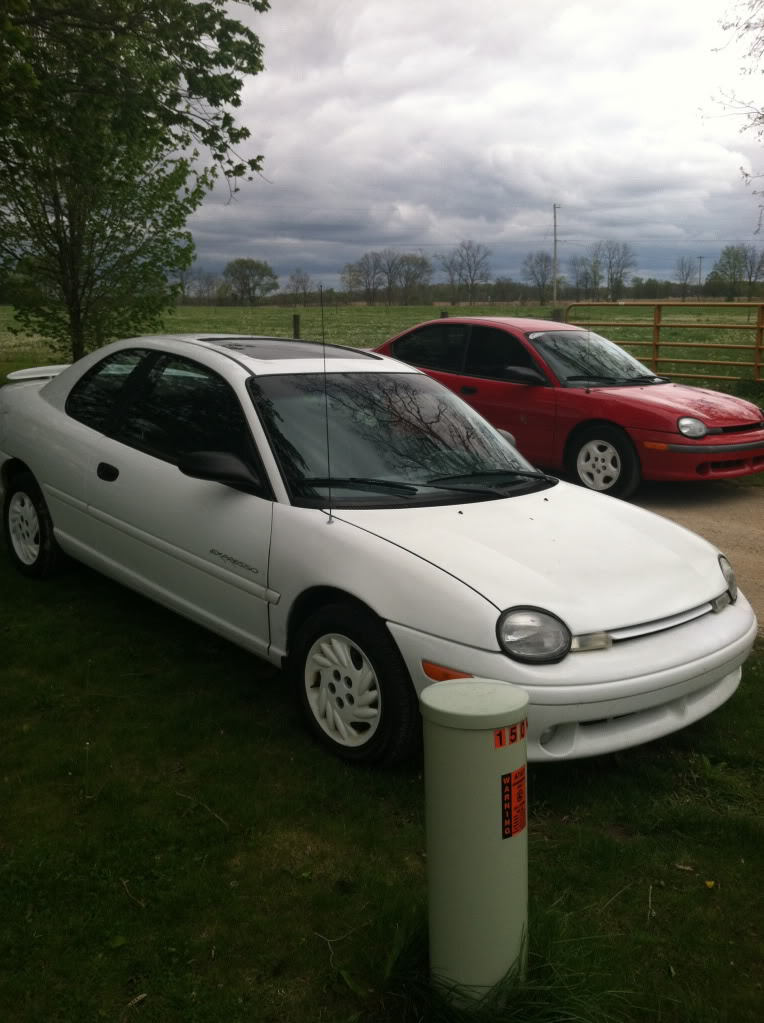

In [6]:
from PIL import Image

raw_image = Image.open('cars_train/' + instance['fname'])
print(class_names[instance['class']])
raw_image

In [7]:
train_split = int(cars_bb_df.shape[0] * 0.8)

cars_bb_df['train'] = False

In [9]:
cars_bb_df.loc[:train_split]['train'] = True
cars_bb_df

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,fname,x1,y1,x2,y2,class,train
0,03609.jpg,55,3,1007,706,165,True
1,06837.jpg,259,730,1381,1117,163,True
2,03738.jpg,76,264,730,526,20,True
3,00951.jpg,115,34,733,555,94,True
4,01298.jpg,28,199,1005,673,19,True
5,00274.jpg,31,69,435,310,19,True
6,07403.jpg,127,148,1444,931,181,True
7,05496.jpg,17,80,618,409,89,True
8,02530.jpg,12,18,256,163,161,True
9,00110.jpg,19,2,591,387,179,True


In [10]:
# cars_bb_df.to_csv('devkit/train_annotations.csv', index=False)

In [ ]:
for index, row in cars_bb_df.iterrows():
    if index % 200 == 0:
        print(index, end=' ')
    
    original = Image.open('cars_train/' + row['fname'])
    bbox = (row['x1'], row['y1'], row['x2'], row['y2'])
    cropped = original.crop(bbox)
    resized = cropped.resize(size=(224,224))
    
    if row['train']:
        resized.save('cars_train_prepped/train/' + row['fname'])
    else:
        resized.save('cars_train_prepped/val/' + row['fname'])

0 200 400 600 800 1000 1200 1400 1600 1800 2000 2200 2400 2600 2800 3000 3200 3400 3600 3800 4000 4200 4400 4600 4800 5000 5200 5400 5600 5800 6000 6200 6400 6600 6800 7000 7200 7400 7600 7800 

In [32]:
a = np.array(Image.open('cars_train/01085.jpg'))
a.shape

(334, 500)

In [1]:
import pandas as pd

class_names = pd.read_csv('devkit/class_names.csv')
cars_anno_df = pd.read_csv('devkit/train_annotations.csv')

In [7]:
val = cars_anno_df[cars_anno_df['train'] == False]
val['class'].value_counts()

84     17
27     15
180    15
21     14
193    14
166    14
131    14
15     13
67     13
81     13
29     13
89     13
178    13
59     13
116    13
108    13
118    13
123    12
72     12
73     12
74     12
104    12
189    12
4      12
7      12
127    12
86     11
122    11
82     11
129    11
       ..
92      5
66      5
158     5
151     5
115     5
133     5
75      5
167     5
37      5
117     5
125     5
112     4
32      4
30      4
141     4
47      4
138     4
164     4
128     4
85      4
168     4
63      3
18      3
182     3
11      3
25      3
14      3
153     3
94      2
99      1
Name: class, Length: 196, dtype: int64

In [8]:
train = cars_anno_df[cars_anno_df['train'] == True]
train['class'].value_counts()

118    55
94     44
160    42
164    41
78     41
30     40
153    40
14     40
147    39
52     39
111    39
138    39
75     39
47     39
182    39
85     39
112    39
42     38
18     38
32     38
161    38
97     38
170    38
106    37
50     37
19     37
88     37
136    37
154    37
190    37
       ..
101    29
70     29
90     29
6      29
140    29
21     29
184    29
77     28
89     28
40     27
44     27
127    27
123    27
61     27
67     27
63     27
84     27
9      26
41     26
27     26
68     26
46     25
16     25
1      24
180    23
59     23
174    23
98     22
157    20
135    18
Name: class, Length: 196, dtype: int64

In [2]:
from DataLoader import DataLoader

val_loader = DataLoader(train=False)


----------VAL LOADER----------

Data: 1625
Labels: 1625
Data instance: (224, 224, 3)


Id: 00643.jpg - Label: Volvo 240 Sedan 1993


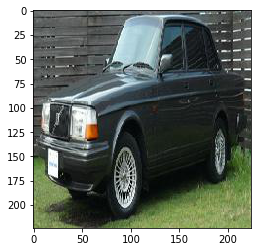

In [11]:
import matplotlib.pyplot as plt

index = 1

ids = val_loader.ids[index]
image = val_loader.data[index]
label = class_names.loc[list(val_loader.labels[index]).index(1), 'model']

print('Id: {} - Label: {}'.format(ids, label))

plt.imshow(image)
plt.show()